In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [7]:
#from google.colab import files
#uploaded = files.upload()


Saving fake.csv to fake.csv


In [8]:
# Load the datasets
def load_data(true_file, fake_file):
    # Read both CSV files
    true_news = pd.read_csv(true_file)
    fake_news = pd.read_csv(fake_file)

    # Add labels
    true_news['label'] = 1  # 1 for true news
    fake_news['label'] = 0  # 0 for fake news

    # Combine datasets
    df = pd.concat([true_news, fake_news], ignore_index=True)

    return df

def explore_data(df):
    # Basic information about the dataset
    print("\n=== Dataset Information ===")
    print(f"Total number of articles: {len(df)}")
    print("\nClass distribution:")
    print(df['label'].value_counts())
    print("\nClass distribution (percentage):")
    print(df['label'].value_counts(normalize=True) * 100)

    # Calculate text lengths
    df['text_length'] = df['text'].str.len()

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # 1. Distribution of text lengths by class
    plt.subplot(1, 3, 1)
    sns.boxplot(x='label', y='text_length', data=df)
    plt.title('Text Length Distribution by Class')
    plt.xlabel('Class (0=Fake, 1=True)')
    plt.ylabel('Text Length')

    # 2. Class distribution bar plot
    plt.subplot(1, 3, 2)
    df['label'].value_counts().plot(kind='bar')
    plt.title('Number of Articles by Class')
    plt.xlabel('Class (0=Fake, 1=True)')
    plt.ylabel('Count')

    # 3. Text length histogram
    plt.subplot(1, 3, 3)
    plt.hist(df['text_length'], bins=50)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def create_word_clouds(df):
    # Download stopwords if not already downloaded
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    plt.figure(figsize=(15, 5))

    # Create word clouds for both classes
    for i, label in enumerate(['Fake News', 'True News']):
        plt.subplot(1, 2, i+1)
        text = ' '.join(df[df['label'] == i]['text'])
        wordcloud = WordCloud(
            width=800, height=400,
            stopwords=stop_words,
            background_color='white'
        ).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - {label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def analyze_basic_stats(df):
    print("\n=== Basic Statistics ===")
    print("\nText Length Statistics:")
    print(df.groupby('label')['text_length'].describe())

    # Sample of true and fake news
    print("\nSample of True News (first 100 characters):")
    print(df[df['label'] == 1]['text'].iloc[0][:100])
    print("\nSample of Fake News (first 100 characters):")
    print(df[df['label'] == 0]['text'].iloc[0][:100])


In [9]:
# Load your data
df = load_data('true.csv', 'fake.csv')


=== Dataset Information ===
Total number of articles: 44898

Class distribution:
label
0    23481
1    21417
Name: count, dtype: int64

Class distribution (percentage):
label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


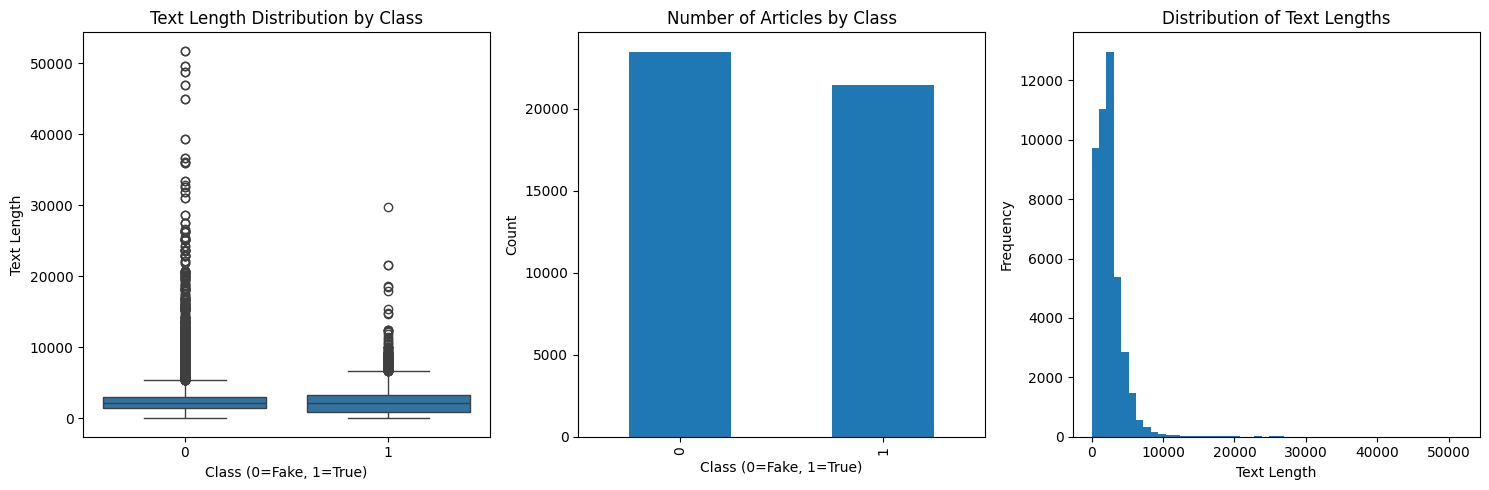

In [10]:
explore_data(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


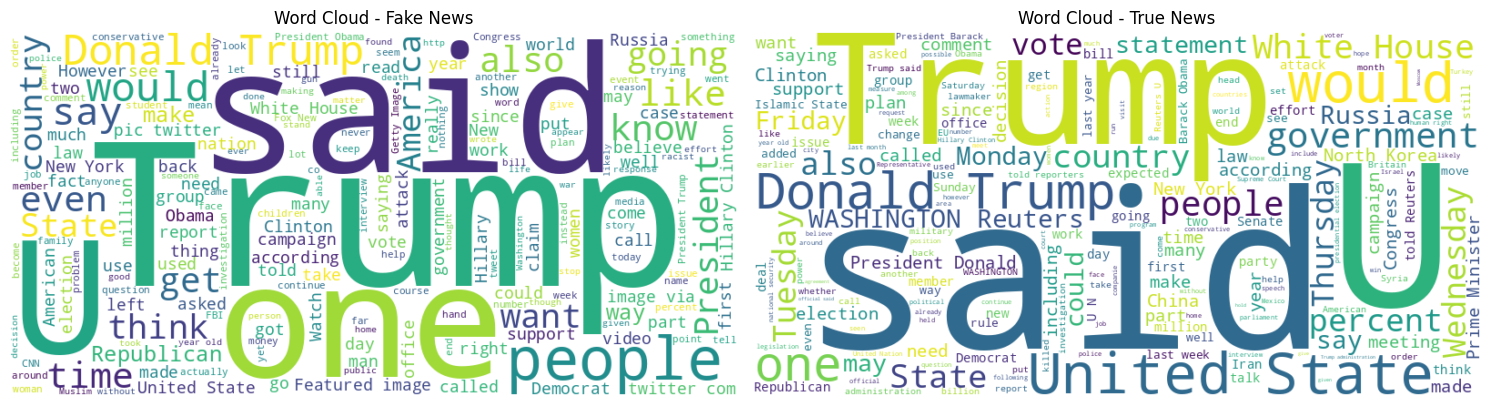

In [11]:
create_word_clouds(df)

In [12]:
analyze_basic_stats(df)


=== Basic Statistics ===

Text Length Statistics:
         count         mean          std  min     25%     50%     75%      max
label                                                                         
0      23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0  51794.0
1      21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0  29781.0

Sample of True News (first 100 characters):
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted

Sample of Fake News (first 100 characters):
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [15]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    """
    Clean and preprocess the text data
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def advanced_preprocess(text):
    """
    Apply advanced preprocessing including tokenization and lemmatization
    """
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

def preprocess_data(df, max_length=None):
    """
    Main preprocessing function
    """
    print("Starting preprocessing...")

    # Create copy to avoid modifying original data
    df_processed = df.copy()

    # Basic cleaning
    print("Cleaning text...")
    df_processed['cleaned_text'] = df_processed['text'].apply(clean_text)

    # Advanced preprocessing
    print("Applying advanced preprocessing...")
    df_processed['processed_text'] = df_processed['cleaned_text'].apply(advanced_preprocess)

    # Remove extreme outliers if max_length is specified
    if max_length:
        df_processed = df_processed[df_processed['processed_text'].str.len() <= max_length]

    return df_processed

def extract_features(df_processed, max_features=5000):
    """
    Extract TF-IDF features from processed text
    """
    print("Extracting TF-IDF features...")

    # Initialize TF-IDF vectorizer
    vectorizer = TfidfVectorizer(
        max_features=max_features,
        min_df=2,  # Minimum document frequency
        max_df=0.95  # Maximum document frequency
    )

    # Fit and transform the processed text
    X = vectorizer.fit_transform(df_processed['processed_text'])
    y = df_processed['label']

    return X, y, vectorizer

def split_data(X, y, test_size=0.2, val_size=0.25):
    """
    Split data into train, validation, and test sets
    """
    print("Splitting data...")

    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Second split: separate train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=val_size,
        random_state=42,
        stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

def visualize_preprocessing_results(df_original, df_processed):
    """
    Visualize the effects of preprocessing
    """
    plt.figure(figsize=(15, 5))

    # Original text length distribution
    plt.subplot(1, 2, 1)
    plt.hist(df_original['text'].str.len(), bins=50, alpha=0.5, label='Original')
    plt.title('Original Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')

    # Processed text length distribution
    plt.subplot(1, 2, 2)
    plt.hist(df_processed['processed_text'].str.len(), bins=50, alpha=0.5, label='Processed')
    plt.title('Processed Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# 1. Apply preprocessing
df_processed = preprocess_data(df, max_length=10000)

Starting preprocessing...
Cleaning text...
Applying advanced preprocessing...


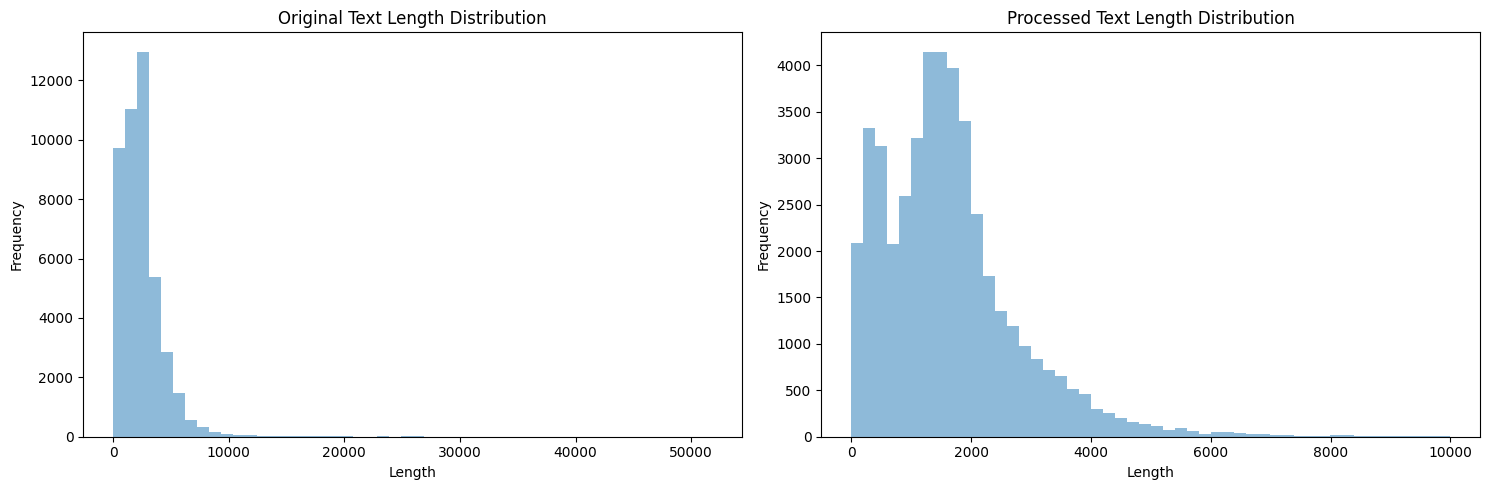

In [17]:
# 2. Visualize the effects of preprocessing
visualize_preprocessing_results(df, df_processed)

In [18]:
# 3. Extract features and split data
X, y, vectorizer = extract_features(df_processed)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

Extracting TF-IDF features...
Splitting data...


In [19]:
# Print shapes to verify the splits
print("\nData split shapes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Data split shapes:
Training set: (26845, 5000)
Validation set: (8949, 5000)
Test set: (8949, 5000)


In [20]:
# Custom Dataset
class FakeNewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.toarray())  # Convert sparse matrix to dense
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model Architecture
class FakeNewsClassifier(nn.Module):
    def __init__(self, input_dim):
        super(FakeNewsClassifier, self).__init__()

        self.model = nn.Sequential(
            # First layer
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            # Second layer
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),

            # Third layer
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),

            # Output layer
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))

            # Backward pass
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_correct += (predicted == labels.unsqueeze(1)).sum().item()
            train_total += labels.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = train_correct / train_total
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.unsqueeze(1))

                total_val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                val_correct += (predicted == labels.unsqueeze(1)).sum().item()
                val_total += labels.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')

    return train_losses, val_losses

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Visualization functions
def plot_training_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [21]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [22]:
# Create data loaders
train_dataset = FakeNewsDataset(X_train, y_train)
val_dataset = FakeNewsDataset(X_val, y_val)
test_dataset = FakeNewsDataset(X_test, y_test)

In [23]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [25]:
# Initialize model
input_dim = X_train.shape[1]  # 5000 features
model = FakeNewsClassifier(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10
)

Epoch 1/10: 100%|██████████| 839/839 [00:32<00:00, 26.04it/s]


Epoch [1/10]
Train Loss: 0.1015, Train Accuracy: 0.9641
Val Loss: 0.0433, Val Accuracy: 0.9875


Epoch 2/10: 100%|██████████| 839/839 [00:31<00:00, 26.67it/s]


Epoch [2/10]
Train Loss: 0.0441, Train Accuracy: 0.9864
Val Loss: 0.0416, Val Accuracy: 0.9869


Epoch 3/10: 100%|██████████| 839/839 [00:30<00:00, 27.27it/s]


Epoch [3/10]
Train Loss: 0.0249, Train Accuracy: 0.9920
Val Loss: 0.0349, Val Accuracy: 0.9896


Epoch 4/10: 100%|██████████| 839/839 [00:31<00:00, 26.27it/s]


Epoch [4/10]
Train Loss: 0.0191, Train Accuracy: 0.9943
Val Loss: 0.0323, Val Accuracy: 0.9922


Epoch 5/10: 100%|██████████| 839/839 [00:31<00:00, 26.99it/s]


Epoch [5/10]
Train Loss: 0.0150, Train Accuracy: 0.9957
Val Loss: 0.0384, Val Accuracy: 0.9896


Epoch 6/10: 100%|██████████| 839/839 [00:31<00:00, 26.72it/s]


Epoch [6/10]
Train Loss: 0.0121, Train Accuracy: 0.9965
Val Loss: 0.0371, Val Accuracy: 0.9902


Epoch 7/10: 100%|██████████| 839/839 [00:32<00:00, 25.96it/s]


Epoch [7/10]
Train Loss: 0.0095, Train Accuracy: 0.9969
Val Loss: 0.0384, Val Accuracy: 0.9912


Epoch 8/10: 100%|██████████| 839/839 [00:33<00:00, 24.89it/s]


Epoch [8/10]
Train Loss: 0.0106, Train Accuracy: 0.9967
Val Loss: 0.0334, Val Accuracy: 0.9915


Epoch 9/10: 100%|██████████| 839/839 [00:32<00:00, 25.69it/s]


Epoch [9/10]
Train Loss: 0.0071, Train Accuracy: 0.9980
Val Loss: 0.0395, Val Accuracy: 0.9907


Epoch 10/10: 100%|██████████| 839/839 [00:33<00:00, 25.17it/s]


Epoch [10/10]
Train Loss: 0.0074, Train Accuracy: 0.9979
Val Loss: 0.0405, Val Accuracy: 0.9902


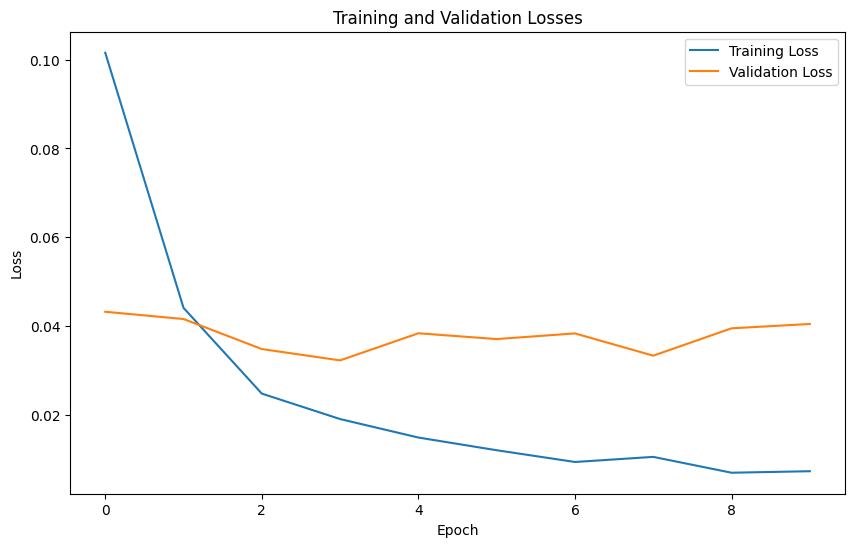

In [26]:
# Plot training curves
plot_training_curves(train_losses, val_losses)

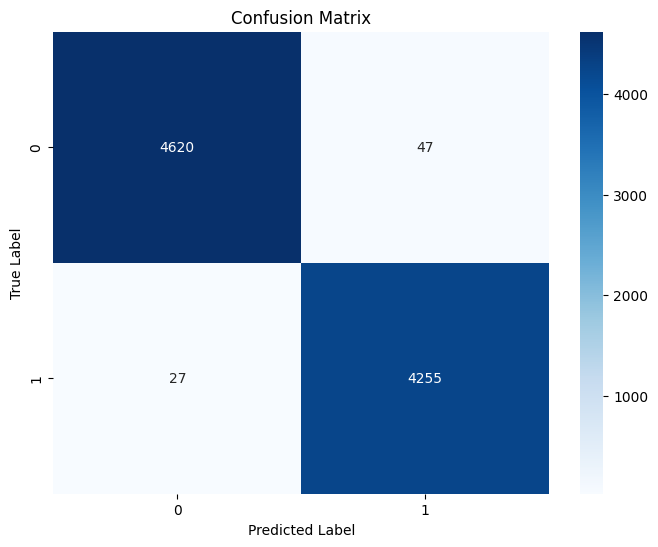


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4667
         1.0       0.99      0.99      0.99      4282

    accuracy                           0.99      8949
   macro avg       0.99      0.99      0.99      8949
weighted avg       0.99      0.99      0.99      8949



In [27]:
# Evaluate on test set
y_pred, y_true = evaluate_model(model, test_loader, device)
plot_confusion_matrix(y_true, y_pred)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

In [28]:
# Evaluate on test set
model.load_state_dict(torch.load('best_model.pth'))  # Load best model
y_pred, y_true = evaluate_model(model, test_loader, device)

<ipython-input-28-176c273002ed>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))  # Load best model



Test Set Results:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4667
         1.0       0.99      0.99      0.99      4282

    accuracy                           0.99      8949
   macro avg       0.99      0.99      0.99      8949
weighted avg       0.99      0.99      0.99      8949



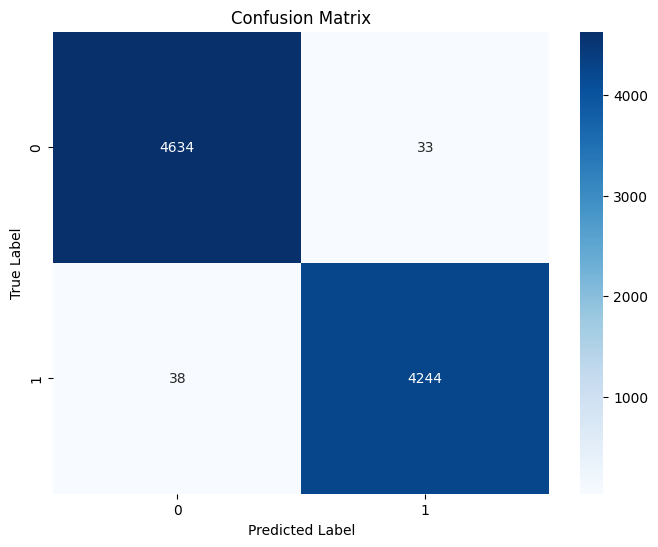

In [29]:
# Print final results
print("\nTest Set Results:")
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)